In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns           # 升級繪圖

In [54]:
df = pd.read_csv('./Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [56]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 資料前處裡
- 名目數據編碼(虛擬變數)
- 手動
    - 先設定 變數={'': ,....}
    - .map(變數)
- 自動1(無順序，One-hot-encoding)
    - df['新欄位'] = pd.get_dummies(df, columns = ['欄位名稱'])
- 自動2(有順序，類似手動，Label encoding)
    - from sklearn.preprocessing import LabelEncoder
        - for i in 資料df:
            - le = LabelEncoder()
            - df['新欄位'] = le.fit_transform(資料['Species'])

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
for i in df:
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Species'])

In [59]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
#手動方法
# 調整 Species 的值 改成 012 ，讓決策樹可以計算
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_data['Species']中。
df['Class'] = df['Species'].map(label_map)

In [60]:
df = df.drop(columns=['Id', 'Species'])

In [61]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- 設定
- 使用.value()可以只取值
    - X(特徵資料，不含label、不含標籤資料)
    - Y(定欄位的標籤資料，不含label)

In [62]:
x = df.drop(labels=['Class'], axis=1).values

In [63]:
y = df['Class'].values

# 模型
- 高級視覺化
- seaborn.lmplot() 
    - 函式使用給定的資料在 FacetGrid 上建立一個基本的散點圖。
    - 還可用於通過在圖中繪製可選的迴歸線
        - sns.lmplot('label01', "label02", hue='分類依據', data=, fit_reg=False)
        - 趨勢線功能:fit_reg=
- cmap: 颜色區分

### K-means(屬於非監督學習)

In [64]:
from sklearn.cluster import KMeans

In [65]:
KM = KMeans(n_clusters=3, random_state=50)

In [66]:
K_fit = KM.fit_predict(x)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


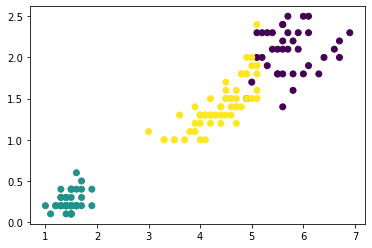

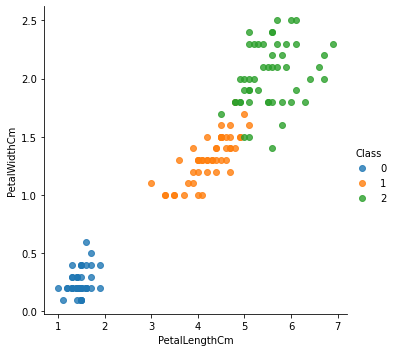

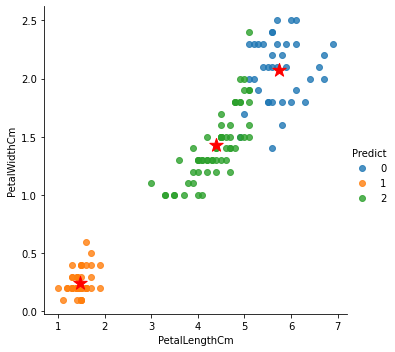

In [67]:
# SepalWidthCm 是第2個；PetalLengthCm 是第3個
plt.scatter(x[:, 2], x[:, 3], c=K_fit)  # 低階繪圖

df['Predict'] = K_fit
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Class', fit_reg=False)
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=df, hue="Predict", fit_reg=False)

centers = KM.cluster_centers_  # 中心點
# SepalWidthCm 是第2個；PetalLengthCm 是第3個
plt.scatter(centers[:, 2], centers[:, 3], c="r",marker='*', s=200)
plt.show()

### 決策樹

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.3, random_state=50)

In [71]:
dec_tree = DecisionTreeClassifier()

In [72]:
dec_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [73]:
tree_pt = dec_tree.predict(train_x)    # 繪圖用的

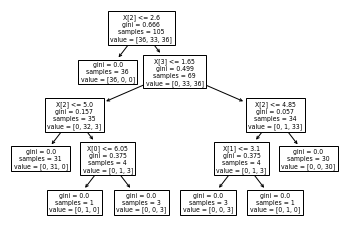

In [74]:
from sklearn import tree
tree.plot_tree(dec_tree)
plt.show()

### 隨機森林

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=50)

In [78]:
randfo = RandomForestClassifier()

In [79]:
randfo.fit(x_train, y_train)

RandomForestClassifier()

In [80]:
rdf_pt = randfo.predict(x_train)

### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.3, random_state=50)

In [83]:
knn_ml= KNeighborsClassifier()

In [84]:
knn_ml.fit(train_x, train_y)

KNeighborsClassifier()

In [85]:
knn_mlpt = knn_ml.predict(train_x)     # 繪圖用的

### SVM
- 降維
- 四種不同SVC分類器:(kernel=?)
    - LinearSVC (線性) [未設定參數]
    - kernel='linear' (線性)
    - kernel='poly' (非線性)
    - kernel='rbf' (非線性)

In [86]:
from sklearn import svm

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.3, random_state=50)

#### PCA降維
- sklearn.decomposition import PCA
- 將原先 iris 4個特徵降成2維

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=2)
train_reduced = pca.fit_transform(train_x)

In [91]:
svm_ml = svm.LinearSVC()

In [92]:
svm_ml.fit(train_reduced, train_y)
svm_pt = svm_ml.predict(train_reduced)    # 繪圖用的

### XGBoost

In [93]:
from xgboost import XGBClassifier

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
train_x, test_x, train_y, test_y =train_test_split(x, y, test_size=.3, random_state=50)

In [96]:
xgbc = XGBClassifier()

In [97]:
xgbc.fit(train_x, train_y)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [98]:
xgbc_pt = xgbc.predict(train_x)  # 繪圖用的

### 羅吉斯

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.3, random_state=50)

In [102]:
logcv = LogisticRegression()

In [103]:
logcv.fit(train_x, train_y)

LogisticRegression()

In [104]:
logcv_pt = logcv.predict(train_x)   # 繪圖用

# 評估  ->.fit()

### K-means
- Silhouette Coefficient 越大代表分群效果越好

In [105]:
from sklearn.metrics import silhouette_score

In [106]:
KM_scores = silhouette_score(x, K_fit)

In [107]:
KM_scores

0.5525919445499757

### 決策樹

In [108]:
print('訓練集:', dec_tree.score(train_x, train_y))
print('測試集:', dec_tree.score(test_x, test_y))

訓練集: 1.0
測試集: 0.9555555555555556


### 隨機森林

In [109]:
print('訓練集:', randfo.score(train_x, train_y))
print('測試集:', randfo.score(test_x, test_y))

訓練集: 1.0
測試集: 0.9555555555555556


In [110]:
print('特徵重要程度: ', randfo.feature_importances_)

特徵重要程度:  [0.1150715  0.02994597 0.41053495 0.44444758]


### KNN

In [111]:
print('訓練集:', knn_ml.score(train_x, train_y))
print('測試集:', knn_ml.score(test_x, test_y))

訓練集: 0.9714285714285714
測試集: 0.9333333333333333


### SVM

In [112]:
print('準確度:', svm_ml.score(train_reduced, train_y))

準確度: 0.9523809523809523


##### 繪製決策邊界 Function
- meshgrid()網格搜尋函式

In [113]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

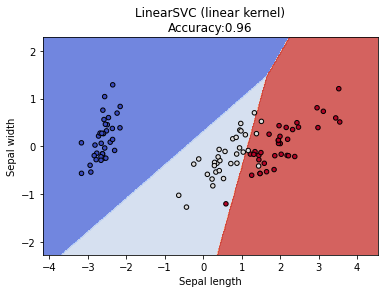

In [114]:
X0, X1 = train_reduced[:, 0], train_reduced[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(plt, svm_ml, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('LinearSVC (linear kernel)'+ '\n' + 'Accuracy:{:.2f}'.format(dec_tree.score(test_x, test_y)))
plt.show()

### XGBoost

In [115]:
print('訓練集:', xgbc.score(train_x, train_y))
print('測試集:', xgbc.score(test_x, test_y))

訓練集: 1.0
測試集: 0.9555555555555556


特徵重要程度:  [0.03303243 0.01450617 0.5782917  0.37416968]


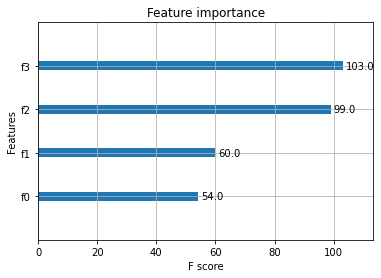

In [116]:
from xgboost import plot_importance
plot_importance(xgbc)
print('特徵重要程度: ',xgbc.feature_importances_)

### 羅吉斯

In [117]:
print('訓練集:', logcv.score(train_x, train_y))
print('測試集:', logcv.score(test_x, test_y))

訓練集: 0.9809523809523809
測試集: 0.9777777777777777


# 優化模型(提高準確度)

K-means
- The Elbow Method
- The Silhouette Method
    - 用迴圈試試做10次，找K值
    - Klist = [KMeans(n_clusters=k, random_state=46).fit(X) for k in range(1, 10)]
    - Klist_1 = [silhouette_score(X, i.labels_)  for i in Klist[1:]]

In [ ]:
Klist = [KMeans(n_clusters=i, random_state=10).fit(x)for i in range(1, 10)]

In [119]:
# 記錄每種 K 值建出的 KMeans 模型的成效
Klist = []
K_sse = []

for k in range(1, 10):
    kl = KMeans(n_clusters = k, random_state=10).fit(x)
    Klist.append(kl)
    K_sse.append(kl.inertia_)        # Elbow Method

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [120]:
Klist

[KMeans(n_clusters=1, random_state=10),
 KMeans(n_clusters=2, random_state=10),
 KMeans(n_clusters=3, random_state=10),
 KMeans(n_clusters=4, random_state=10),
 KMeans(n_clusters=5, random_state=10),
 KMeans(n_clusters=6, random_state=10),
 KMeans(n_clusters=7, random_state=10),
 KMeans(random_state=10),
 KMeans(n_clusters=9, random_state=10)]

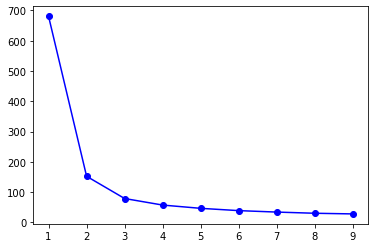

In [121]:
plt.plot(range(1, 10), K_sse, "bo-")

plt.show()

即inertia迅速下降轉為平緩的那個點

In [122]:
from sklearn.metrics import silhouette_score
Klist_2 = [silhouette_score(x, k.labels_)for k in Klist[1:]]

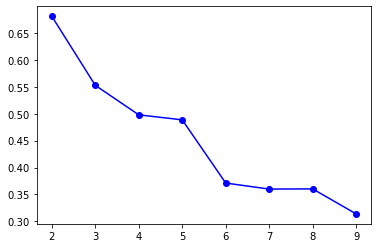

In [123]:
plt.plot(range(2, 10), Klist_2, "bo-")
plt.show()

越大代表分群效果越好

### KNN

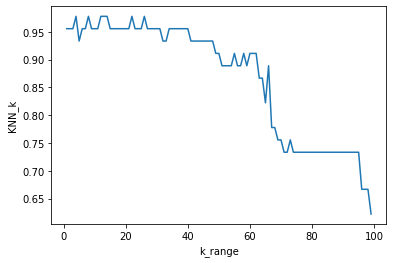

In [124]:
from sklearn import metrics

KNN_k = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train)                 
    y_pred = knn.predict(x_test)              # x 測試要 等於期望的預測
    KNN_k.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1,100)
plt.plot(k_range, KNN_k)

plt.xlabel('k_range')
plt.ylabel('KNN_k')
plt.show()

# 儲存 訓練好的模型
- import pickle
    - 副檔名.pkl
    - 參數 'wb'
    -  pickle.dump(模型變數名稱, f)

In [ ]:
import pickle

### 讀取模型
- with open('./sentiment_classf.pkl', 'rb') as file:
    - pickle.load(file)

### 使用模型